In [28]:
from pathlib import Path

import gym
from gym import spaces
from rljax.algorithm import DQN, FQF
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'SH_SDS_data.csv'))
data = raw.process()

In [3]:
def sniper(state_1, state_2, env, start_state):
    state = start_state
    done = False
    all_rewards = list()
    while not done:
        if state[0] == state_1:
            state, reward, done, _ = env.step(0)
        elif state[0] == state_2:
            state, reward, done, _ = env.step(1)
        else:
            state, reward, done, _ = env.step(2)
        all_rewards.append(reward)
    return all_rewards

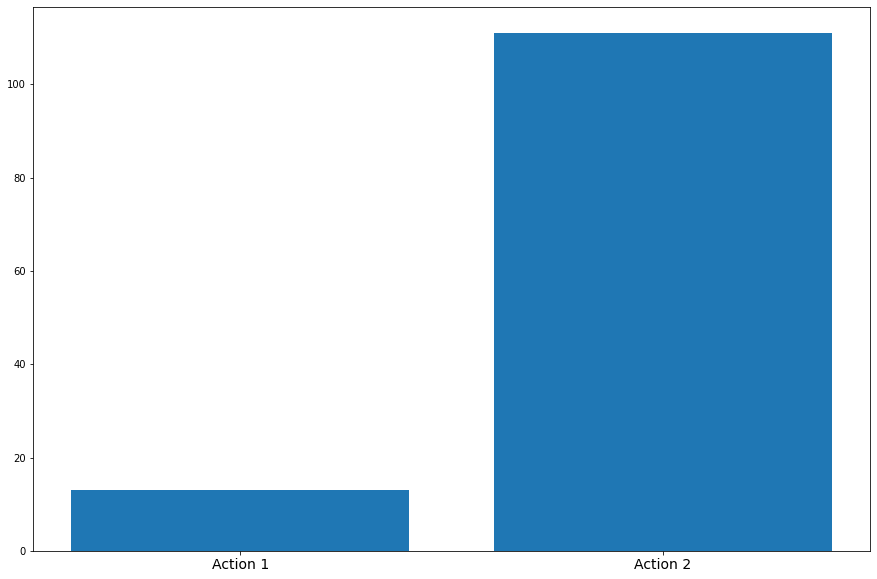

In [4]:
env = Env(data, no_trade_period=10, steps=2000)
mappings = env.mapping
sniper(mappings['121'], mappings['401'], env, env.reset())
sniper(mappings['122'], mappings['401'], env, env.reset())
env.summarize_state_decisions('401')

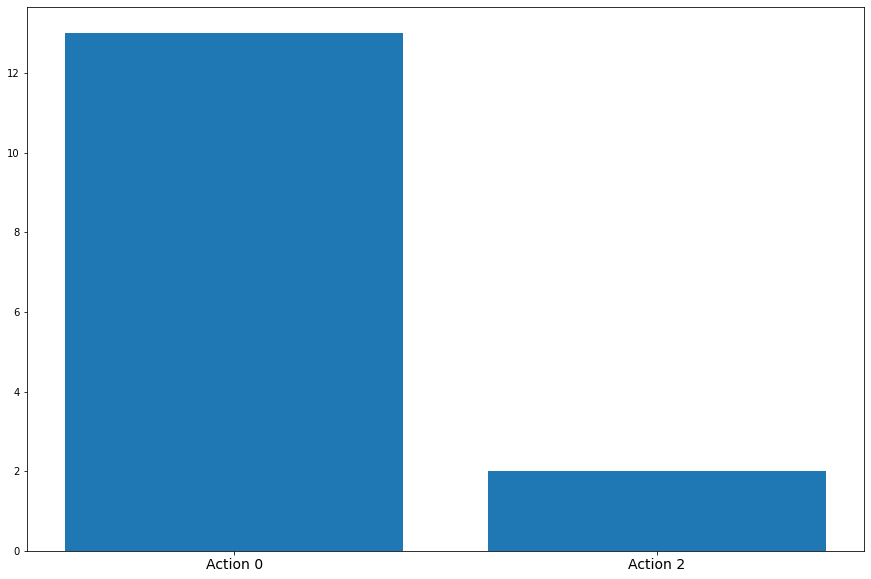

In [5]:
env.summarize_state_decisions('122')

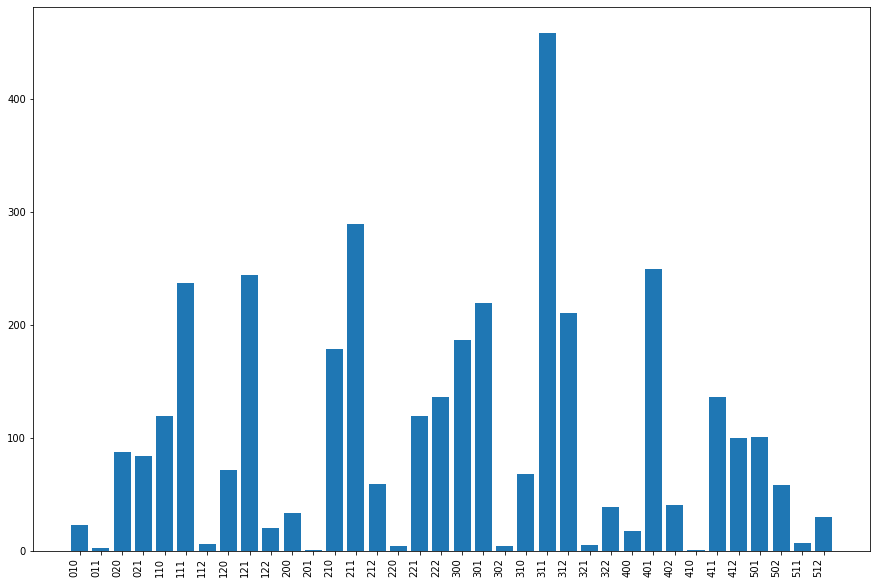

In [6]:
env.plot_state_frequency()


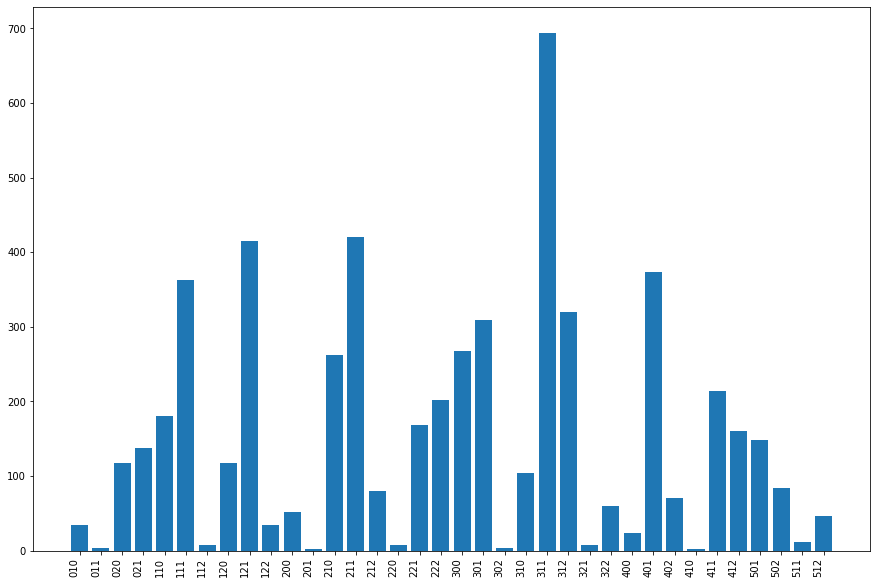

In [7]:
env.plot_state_frequency()

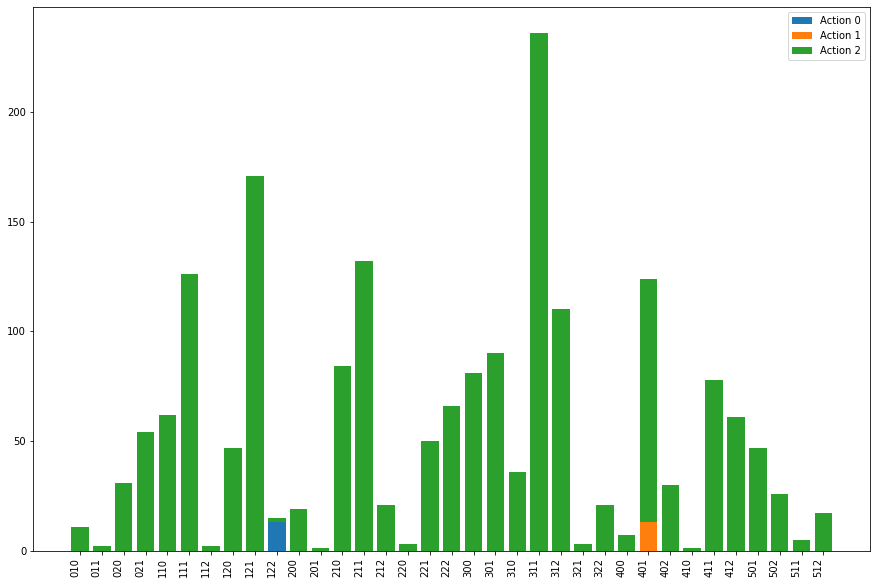

In [8]:
env.summarize_decisions()

In [29]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 5000
SEED = 0

env = Env(data, no_trade_period=100, steps=2340)
env_test = Env(data, no_trade_period=100, steps=2340)

algo = FQF(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.state_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=1000,
    seed=SEED,
)
trainer.train()

TypeError: tuple indices must be integers or slices, not tuple

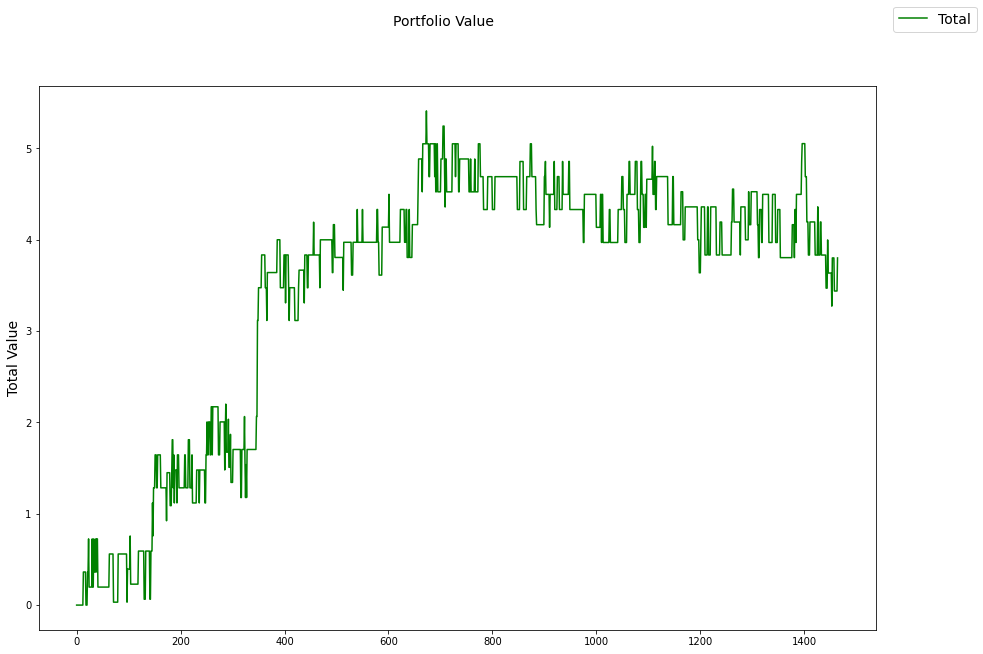

In [25]:
env.plot()

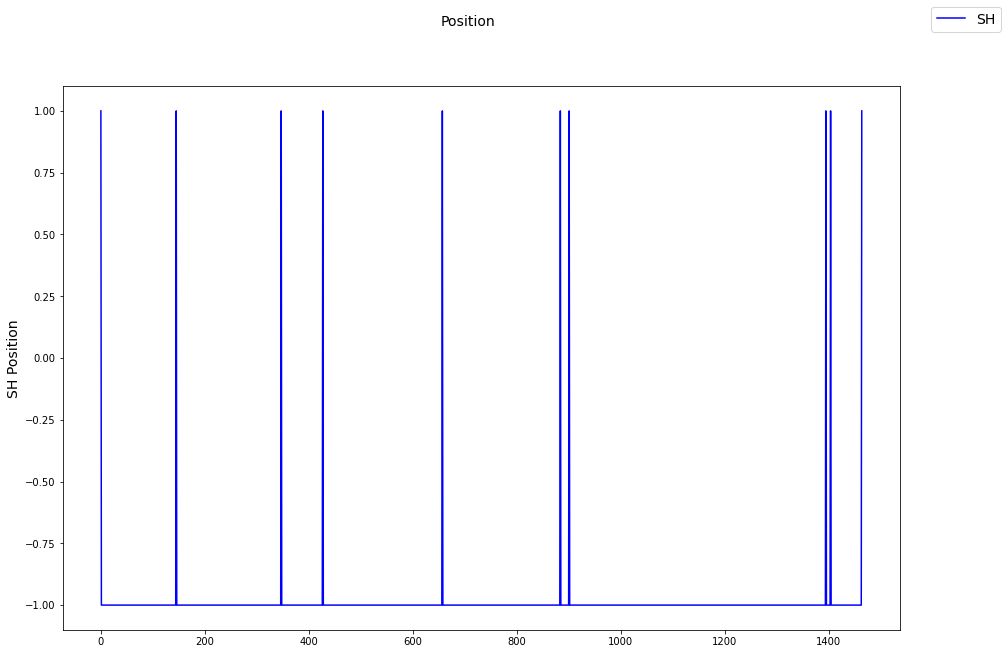

In [26]:
env.plot('position_history')

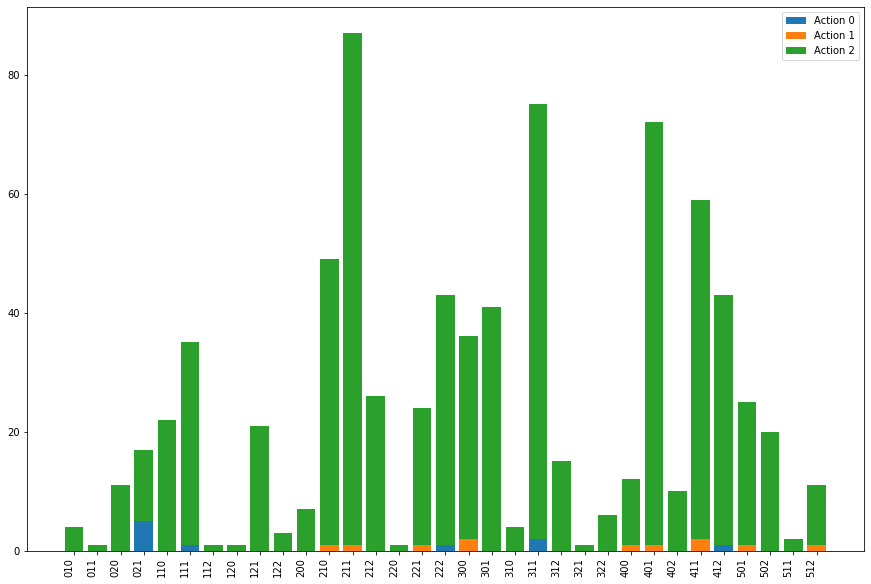

In [27]:
env.summarize_decisions()